# Diabetes Prediction

In [2]:
!pip install livelossplot

In [3]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input
from livelossplot import PlotLossesKerasTF

In [5]:
df=pd.read_csv("/kaggle/input/docspot/datasets_228_482_diabetes.csv")

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape

(768, 9)

In [8]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

#### Separate feature and outcome

In [9]:
x=df.drop(columns="Outcome")
y=df.Outcome

#### Split the data

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [9]:
print(x_train.shape)
print(x_test.shape)

(576, 8)

(192, 8)


#### Standardise the data

In [11]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
st.fit(x_train)
st.fit(x_test)
x_train_std=st.transform(x_train)
x_test_std=st.transform(x_test)

In [11]:
x_train_std

array([[ 1.60844143, -0.94968624, -0.26515007, ..., -1.16144088,
        -1.03645536,  0.07191495],
       [-0.89466499, -0.06439359, -0.46266244, ...,  0.25691236,
        -0.67356257, -0.84250027],
       [-1.20755329, -0.88863157,  0.6236556 , ...,  0.13871626,
         0.36327398, -0.47673418],
       ...,
       [ 0.04399992, -0.79704957, -0.11701579, ..., -0.87251707,
        -1.01815824, -1.02538331],
       [ 2.23421803, -1.07179557,  0.32738704, ..., -0.16334045,
        -0.55463131,  0.25479799],
       [ 0.35688822,  0.48509839,  0.72241178, ..., -4.11634347,
         0.48220523,  3.36380972]])

#### Model Building

In [12]:
model=Sequential()
model.add(Input(shape=(8,),name="Input Layer"))
model.add(Dense(10,activation='relu',name="Hidden1"))
model.add(Dense(12,activation='relu',name="Hidden2"))
model.add(Dense(1,activation='sigmoid',name='OutputLayer'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [14]:
model.summary()

Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 Hidden1 (Dense)             (None, 10)                90        

                                                                 

 Hidden2 (Dense)             (None, 12)                132       

                                                                 

 OutputLayer (Dense)         (None, 1)                 13        

                                                                 


Total params: 235

Trainable params: 235

Non-trainable params: 0

_________________________________________________________________


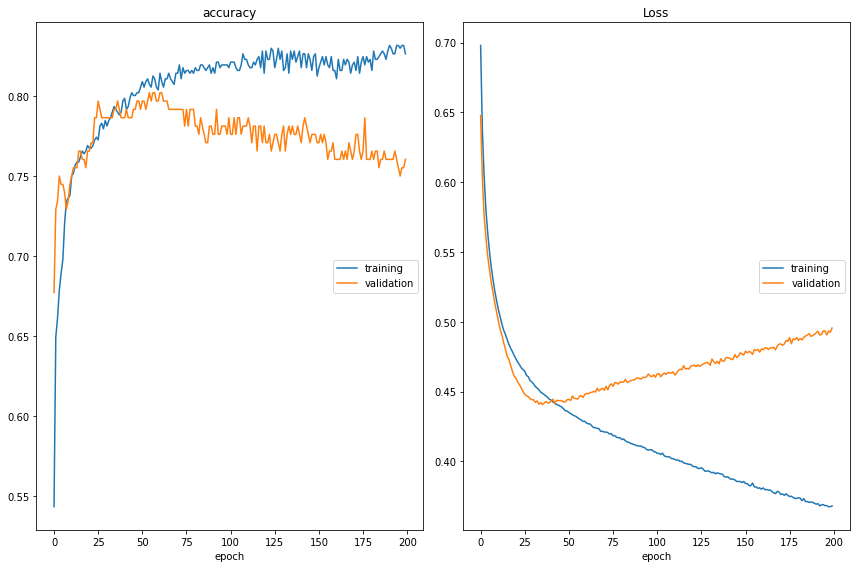

accuracy

	training         	 (min:    0.543, max:    0.832, cur:    0.826)

	validation       	 (min:    0.677, max:    0.802, cur:    0.760)

Loss

	training         	 (min:    0.367, max:    0.698, cur:    0.368)

	validation       	 (min:    0.441, max:    0.648, cur:    0.496)

29/29 [==============================] - 0s 15ms/step - loss: 0.3680 - accuracy: 0.8264 - val_loss: 0.4955 - val_accuracy: 0.7604


In [15]:
model.fit(x_train_std,y_train,epochs=200,batch_size=20, validation_data=(x_test_std,y_test),callbacks=[PlotLossesKerasTF()])

In [16]:
from sklearn.metrics import classification_report

In [17]:
t= model.predict(x_test_std)

In [18]:
t[0]

array([0.9447181], dtype=float32)

In [22]:
print(type(y_test))

<class 'pandas.core.series.Series'>


In [24]:
print(len(t))

192


In [20]:
t1 = []
for i in range(len(t)):
    if t[i] >= 0.5:
        t1.append(1)
    else:
        t1.append(0)

In [21]:
t1

[1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0]

In [23]:
new_pred = pd.Series(t1)  
print(new_pred)

0      1

1      0

2      0

3      1

4      0

      ..

187    0

188    0

189    0

190    1

191    0

Length: 192, dtype: int64


In [16]:
y_test

661    1
122    0
113    0
14     1
529    0
      ..
366    1
301    1
382    0
140    0
463    0
Name: Outcome, Length: 192, dtype: int64

In [21]:
type(y_test)

pandas.core.series.Series

In [24]:
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support



           0       0.80      0.85      0.83       130

           1       0.65      0.56      0.60        62



    accuracy                           0.76       192

   macro avg       0.73      0.71      0.72       192

weighted avg       0.75      0.76      0.76       192




In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,new_pred)

array([[111,  19],
       [ 27,  35]])

In [29]:
conf = confusion_matrix(y_test,new_pred)

tp,fp,fn,tn = confusion_matrix(y_test,new_pred).ravel()
specificity = tn / (tn+fp)
sensitivity= tp / (tp+fn)
print('TP,FP,FN,TN',tp,fp,fn,tn)
print('sensitivity =', sensitivity)
print('specificity =', specificity)

TP,FP,FN,TN 111 19 27 35

sensitivity = 0.8043478260869565

specificity = 0.6481481481481481


In [30]:
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, new_pred[:])
print('roc_auc_score is',auc_score1)

roc_auc_score is 0.709181141439206


# Precison and Recall

In [12]:
from tensorflow.keras.metrics import Precision, Recall

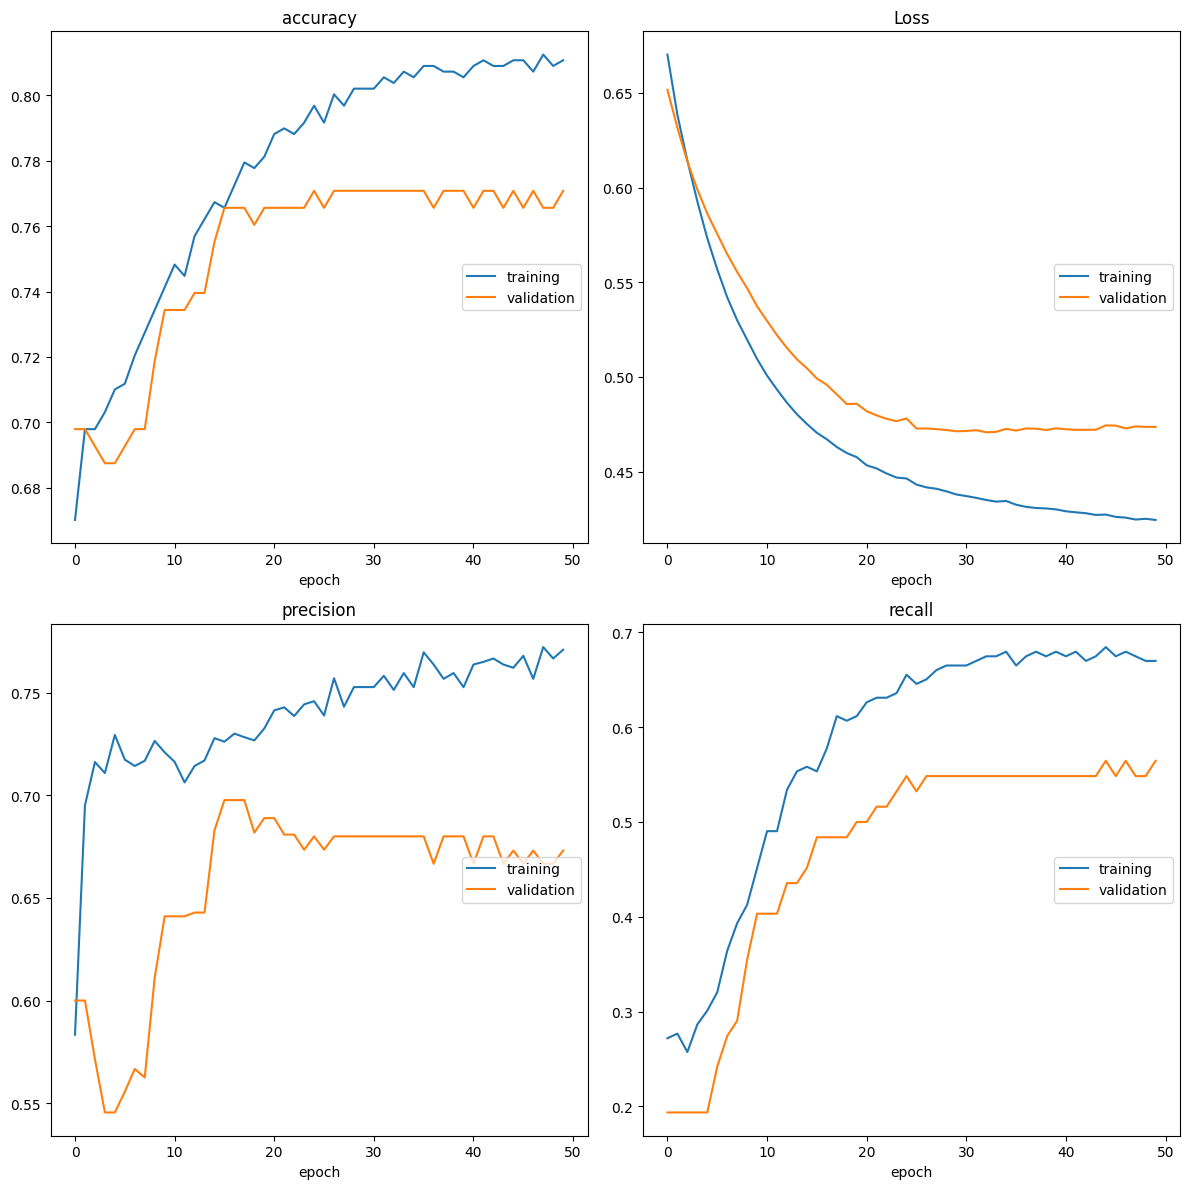

accuracy
	training         	 (min:    0.670, max:    0.812, cur:    0.811)
	validation       	 (min:    0.688, max:    0.771, cur:    0.771)
Loss
	training         	 (min:    0.424, max:    0.670, cur:    0.424)
	validation       	 (min:    0.471, max:    0.652, cur:    0.474)
precision
	training         	 (min:    0.583, max:    0.772, cur:    0.771)
	validation       	 (min:    0.545, max:    0.698, cur:    0.673)
recall
	training         	 (min:    0.257, max:    0.684, cur:    0.670)
	validation       	 (min:    0.194, max:    0.565, cur:    0.565)
29/29 [==============================] - 1s 37ms/step - loss: 0.4244 - accuracy: 0.8108 - precision: 0.7709 - recall: 0.6699 - val_loss: 0.4736 - val_accuracy: 0.7708 - val_precision: 0.6731 - val_recall: 0.5645


In [13]:
model=Sequential()
model.add(Input(shape=(8,),name="Input Layer"))
model.add(Dense(10,activation='relu',name="Hidden1"))
model.add(Dense(12,activation='relu',name="Hidden2"))
model.add(Dense(1,activation='sigmoid',name='OutputLayer'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy',Precision(),Recall()])
model.fit(x_train_std,y_train,epochs=50,batch_size=20, validation_data=(x_test_std,y_test),callbacks=[PlotLossesKerasTF()])